<a href="https://colab.research.google.com/github/Sruthi-2002/AI-LAB-WEEK-6/blob/main/AI_LAB_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/My Drive/AI LAB 5

/content/gdrive/My Drive/AI LAB 5


In [ ]:
import pandas as pd 
import numpy as np 

# Quick value count calculator
from collections import Counter

In [ ]:
data = pd.read_excel('tesnnis.xlsx')
data

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


    day   outlook  temp  humidity    wind play  outlooks  temps  winds
0    D1     Sunny   Hot         0    Weak   No         2      1      1
1    D2     Sunny   Hot         0  Strong   No         2      1      0
2    D3  Overcast   Hot         0    Weak  Yes         0      1      1
3    D4      Rain  Mild         0    Weak  Yes         1      2      1
4    D5      Rain  Cool         1    Weak  Yes         1      0      1
5    D6      Rain  Cool         1  Strong   No         1      0      0
6    D7  Overcast  Cool         1  Strong  Yes         0      0      0
7    D8     Sunny  Mild         0    Weak   No         2      2      1
8    D9     Sunny  Cool         1    Weak  Yes         2      0      1
9   D10      Rain  Mild         1    Weak  Yes         1      2      1
10  D11     Sunny  Mild         1  Strong  Yes         2      2      0
11  D12  Overcast  Mild         0  Strong  Yes         0      2      0
12  D13  Overcast   Hot         1    Weak  Yes         0      1      1
13  D1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


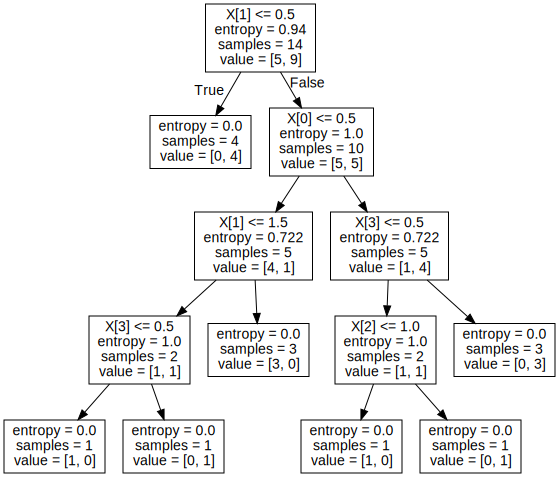

In [ ]:
import pandas as pd
import numpy as np
from graphviz import Source
import graphviz
import pydotplus
print(data)
input = data.drop('play',axis='columns')
print('target\n',input)
target = data['play']
print('target: \n',target)
from sklearn.preprocessing import LabelEncoder
day = LabelEncoder()
outlook = LabelEncoder()
temp = LabelEncoder()
humidity = LabelEncoder()
wind = LabelEncoder()
temp_1 = LabelEncoder()
print('testing')
data['outlooks'] = outlook.fit_transform(data['outlook'])
data['temps'] = temp.fit_transform(data['temp'])
data['humidity'] = humidity.fit_transform(data['humidity'])
data['winds'] = temp.fit_transform(data['wind'])
print(data)
print('testing123')
n_data = data.drop(['day','outlook','temp','wind','play'],axis = 'columns')
print(n_data)
print('done with testing')
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion = 'entropy')
model.fit(n_data,target)
print('score: ',model.score(n_data,target))
st = model.predict([[2,1,1,1]])
features = ['outlook','temp','humidity','winds']
print('features',features)
st = tree.export_graphviz(model,out_file = None)
graph = graphviz.Source(st)
graph

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/My Drive/AI LAB 5

/content/gdrive/My Drive/AI LAB 5


In [ ]:
import pandas as pd 
import numpy as np 

# Quick value count calculator
from collections import Counter

In [ ]:
dataset = pd.read_excel('tesnnis.xlsx',  
                      names=['outlook','temp','humidity','wind','play'])

In [ ]:
def calc_total_entropy(train_data, label, class_list):
    total_row = train_data.shape[0] #the total size of the dataset
    total_entr = 0
    
    for c in class_list: #for each class in the label
        total_class_count = train_data[train_data[label] == c].shape[0] #number of the class
        total_class_entr = - (total_class_count/total_row)*np.log2(total_class_count/total_row) #entropy of the class
        total_entr += total_class_entr #adding the class entropy to the total entropy of the dataset        
    print("Entropy before splitting ")
    print(total_entr)
    return total_entr

In [ ]:
def calc_entropy(feature_value_data, label, class_list):
    class_count = feature_value_data.shape[0]
    entropy = 0
    
    for c in class_list:
        label_class_count = feature_value_data[feature_value_data[label] == c].shape[0] #row count of class c 
        
        entropy_class = 0
        if label_class_count != 0:
            probability_class = label_class_count/class_count #probability of the class
            entropy_class = - probability_class * np.log2(probability_class)  #entropy
        entropy += entropy_class
    return entropy

In [ ]:
def calc_info_gain(feature_name, train_data, label, class_list):
    feature_value_list = train_data[feature_name].unique() #unqiue values of the feature
    total_row = train_data.shape[0]
    feature_info = 0.0
    
    for feature_value in feature_value_list: #all possible values of a feature
        feature_value_data = train_data[train_data[feature_name] == feature_value] #filtering rows with that feature_value
        feature_value_count = feature_value_data.shape[0]
        feature_value_entropy = calc_entropy(feature_value_data, label, class_list) #calculcating entropy for the feature value
        feature_value_probability = feature_value_count/total_row
        feature_info += feature_value_probability * feature_value_entropy #calculating information of the feature value
        
    return calc_total_entropy(train_data, label, class_list) - feature_info #calculating information gain by subtracting

In [ ]:
#find feature with hightest information gain
def find_most_informative_feature(train_data, label, class_list):
    feature_list = train_data.columns.drop(label) # feature names in the dataset
                                            
    max_info_gain = -1
    max_info_feature = None
    
    for feature in feature_list:  
        feature_info_gain = calc_info_gain(feature, train_data, label, class_list)
        if max_info_gain < feature_info_gain: 
            max_info_gain = feature_info_gain
            max_info_feature = feature
            
    return max_info_feature

In [ ]:
def generate_sub_tree(feature_name, train_data, label, class_list):
    feature_value_count_dict = train_data[feature_name].value_counts(sort=False) #dictionary of the count of unqiue feature value
    tree = {} #sub tree or node
    
    for feature_value, count in feature_value_count_dict.iteritems():
        feature_value_data = train_data[train_data[feature_name] == feature_value] #dataset with only feature_name = feature_value
        
        assigned_to_node = False #flag for tracking feature_value is pure class or not
        for c in class_list: #for each class
            class_count = feature_value_data[feature_value_data[label] == c].shape[0] #count of class c

            if class_count == count: #count of feature_value = count of class (pure class)
                tree[feature_value] = c #adding node to the tree
                train_data = train_data[train_data[feature_name] != feature_value] #removing rows with feature_value
                assigned_to_node = True
        if not assigned_to_node: #not pure class
            tree[feature_value] = "?" #should extend the node, so the branch is marked with ?
            
    return tree, train_data

In [ ]:
def make_tree(root, prev_feature_value, train_data, label, class_list):
    if train_data.shape[0] != 0: #if dataset becomes empty after updating
        max_info_feature = find_most_informative_feature(train_data, label, class_list) #most informative feature
        tree, train_data = generate_sub_tree(max_info_feature, train_data, label, class_list) #getting tree node and updated dataset
        next_root = None
        
        if prev_feature_value != None: #add to intermediate node of the tree
            root[prev_feature_value] = dict()
            root[prev_feature_value][max_info_feature] = tree
            next_root = root[prev_feature_value][max_info_feature]
        else: #add to root of the tree
            root[max_info_feature] = tree
            next_root = root[max_info_feature]
        
        for node, branch in list(next_root.items()): #iterating the tree node
            if branch == "?": #if it is expandable
                feature_value_data = train_data[train_data[max_info_feature] == node] #using the updated dataset
                make_tree(next_root, node, feature_value_data, label, class_list) #recursive call with updated dataset

In [ ]:
def id3(train_data_m, label):
    train_data = train_data_m.copy() #getting a copy of the dataset
    tree = {} #tree which will be updated
    class_list = train_data[label].unique() #getting unqiue classes of the label
    make_tree(tree, None, train_data_m, label, class_list) #start calling recursion
    return tree

In [ ]:
dataset.head(5)

,outlook,temp,humidity,wind,play
D1,Sunny,Hot,High,Weak,No
D2,Sunny,Hot,High,Strong,No
D3,Overcast,Hot,High,Weak,Yes
D4,Rain,Mild,High,Weak,Yes
D5,Rain,Cool,Normal,Weak,Yes


In [ ]:
tree = id3(dataset, 'play')

Entropy before splitting 
0.9402859586706309
Entropy before splitting 
0.9402859586706309
Entropy before splitting 
0.9402859586706309
Entropy before splitting 
0.9402859586706309
Entropy before splitting 
0.9709505944546686
Entropy before splitting 
0.9709505944546686
Entropy before splitting 
0.9709505944546686
Entropy before splitting 
0.9709505944546686
Entropy before splitting 
0.9709505944546686
Entropy before splitting 
0.9709505944546686
Entropy before splitting 
0.9709505944546686
Entropy before splitting 
0.9709505944546686
